In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklift.models import ClassTransformation
from catboost import CatBoostClassifier
from sklift.metrics import qini_auc_score

In [3]:
data = pd.read_csv('uplift_synthetic_data_100trials.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,trial_id,treatment_group_key,conversion,control_conversion_prob,treatment1_conversion_prob,treatment1_true_effect,x1_informative,x2_informative,x3_informative,x4_informative,...,x27_irrelevant,x28_irrelevant,x29_irrelevant,x30_irrelevant,x31_uplift_increase,x32_uplift_increase,x33_uplift_increase,x34_uplift_increase,x35_uplift_increase,x36_uplift_increase
0,0,control,1,0.516606,0.572609,0.056002,-1.926651,1.233472,-0.475120,0.081283,...,-0.378145,-0.110782,1.087180,-1.222069,-0.279009,1.013911,-0.570859,-1.158216,-1.336279,-0.708056
1,0,treatment1,1,0.304005,0.736460,0.432454,0.904364,0.868705,-0.285977,0.840136,...,-0.742847,0.700239,0.001867,-0.069362,0.045789,1.364182,-0.261643,0.478074,0.531477,0.402723
2,0,treatment1,0,0.134277,0.480985,0.346709,1.680978,1.320889,0.059273,-0.517732,...,0.748884,-0.856898,-0.268034,-2.181874,1.473214,-1.256641,0.901139,2.029204,-0.280445,0.873970
3,0,treatment1,1,0.801968,0.858532,0.056563,-0.335774,-2.940232,-0.302521,0.236998,...,0.151074,0.067547,-0.839246,0.587575,0.412081,0.141189,0.369611,-0.364984,-1.509045,-1.335023
4,0,control,0,0.063552,0.060142,-0.003410,-0.475881,-0.485793,0.978582,-0.610766,...,-1.287117,1.256396,-1.155307,-0.414787,1.163851,0.698114,0.088157,0.478717,-0.680588,-2.730850


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 42 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trial_id                    1000000 non-null  int64  
 1   treatment_group_key         1000000 non-null  object 
 2   conversion                  1000000 non-null  int64  
 3   control_conversion_prob     1000000 non-null  float64
 4   treatment1_conversion_prob  1000000 non-null  float64
 5   treatment1_true_effect      1000000 non-null  float64
 6   x1_informative              1000000 non-null  float64
 7   x2_informative              1000000 non-null  float64
 8   x3_informative              1000000 non-null  float64
 9   x4_informative              1000000 non-null  float64
 10  x5_informative              1000000 non-null  float64
 11  x6_informative              1000000 non-null  float64
 12  x7_informative              1000000 non-null  float64
 13

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
trial_id,1000000.0,49.500000,28.866084,0.000000e+00,24.750000,49.500000,74.250000,99.000000
conversion,1000000.0,0.303751,0.459877,0.000000e+00,0.000000,0.000000,1.000000,1.000000
control_conversion_prob,1000000.0,0.246887,0.183039,2.288396e-09,0.106908,0.200046,0.343053,1.000000
treatment1_conversion_prob,1000000.0,0.357830,0.270874,1.175754e-09,0.123527,0.293636,0.557279,1.000000
treatment1_true_effect,1000000.0,0.110943,0.204681,-9.564959e-01,-0.026364,0.065494,0.232868,0.985236
x1_informative,1000000.0,-0.001585,0.999992,-4.823255e+00,-0.675506,-0.000660,0.672818,4.700681
x2_informative,1000000.0,0.000352,0.999010,-4.941324e+00,-0.674350,0.000091,0.673720,4.661994
x3_informative,1000000.0,0.001122,1.000144,-4.882931e+00,-0.674476,-0.000335,0.675828,4.842620
x4_informative,1000000.0,0.000614,1.000122,-4.780078e+00,-0.673506,-0.000206,0.675615,5.207952
x5_informative,1000000.0,0.000475,1.000363,-4.901258e+00,-0.674200,-0.000395,0.675861,4.729973


In [11]:
pd.crosstab(data.treatment_group_key, data.conversion, normalize='index')

conversion,0,1
treatment_group_key,,
control,0.751472,0.248528
treatment1,0.641026,0.358974


In [12]:
treat_dict = {
    'treatment1': 1,
    'control': 0
}

data.treatment_group_key = data.treatment_group_key.map(treat_dict)

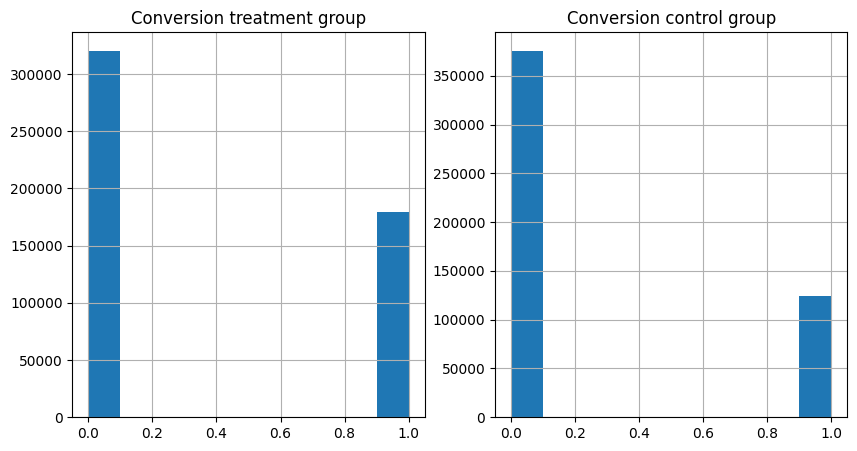

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data[data.treatment_group_key == 1]['conversion'])
ax[0].set_title('Conversion treatment group')
ax[0].grid()
ax[1].hist(data[data.treatment_group_key == 0]['conversion'])
ax[1].set_title('Conversion control group')
ax[1].grid()
plt.show()

In [50]:
func_list = ['x1_informative', 'x2_informative', 'x3_informative', 'x4_informative', 'x5_informative', 'x6_informative', 'x7_informative', 'x8_informative', 'x9_informative',
'x10_informative','x31_uplift_increase', 'x32_uplift_increase', 'x33_uplift_increase', 'x34_uplift_increase', 'x35_uplift_increase', 'x36_uplift_increase']

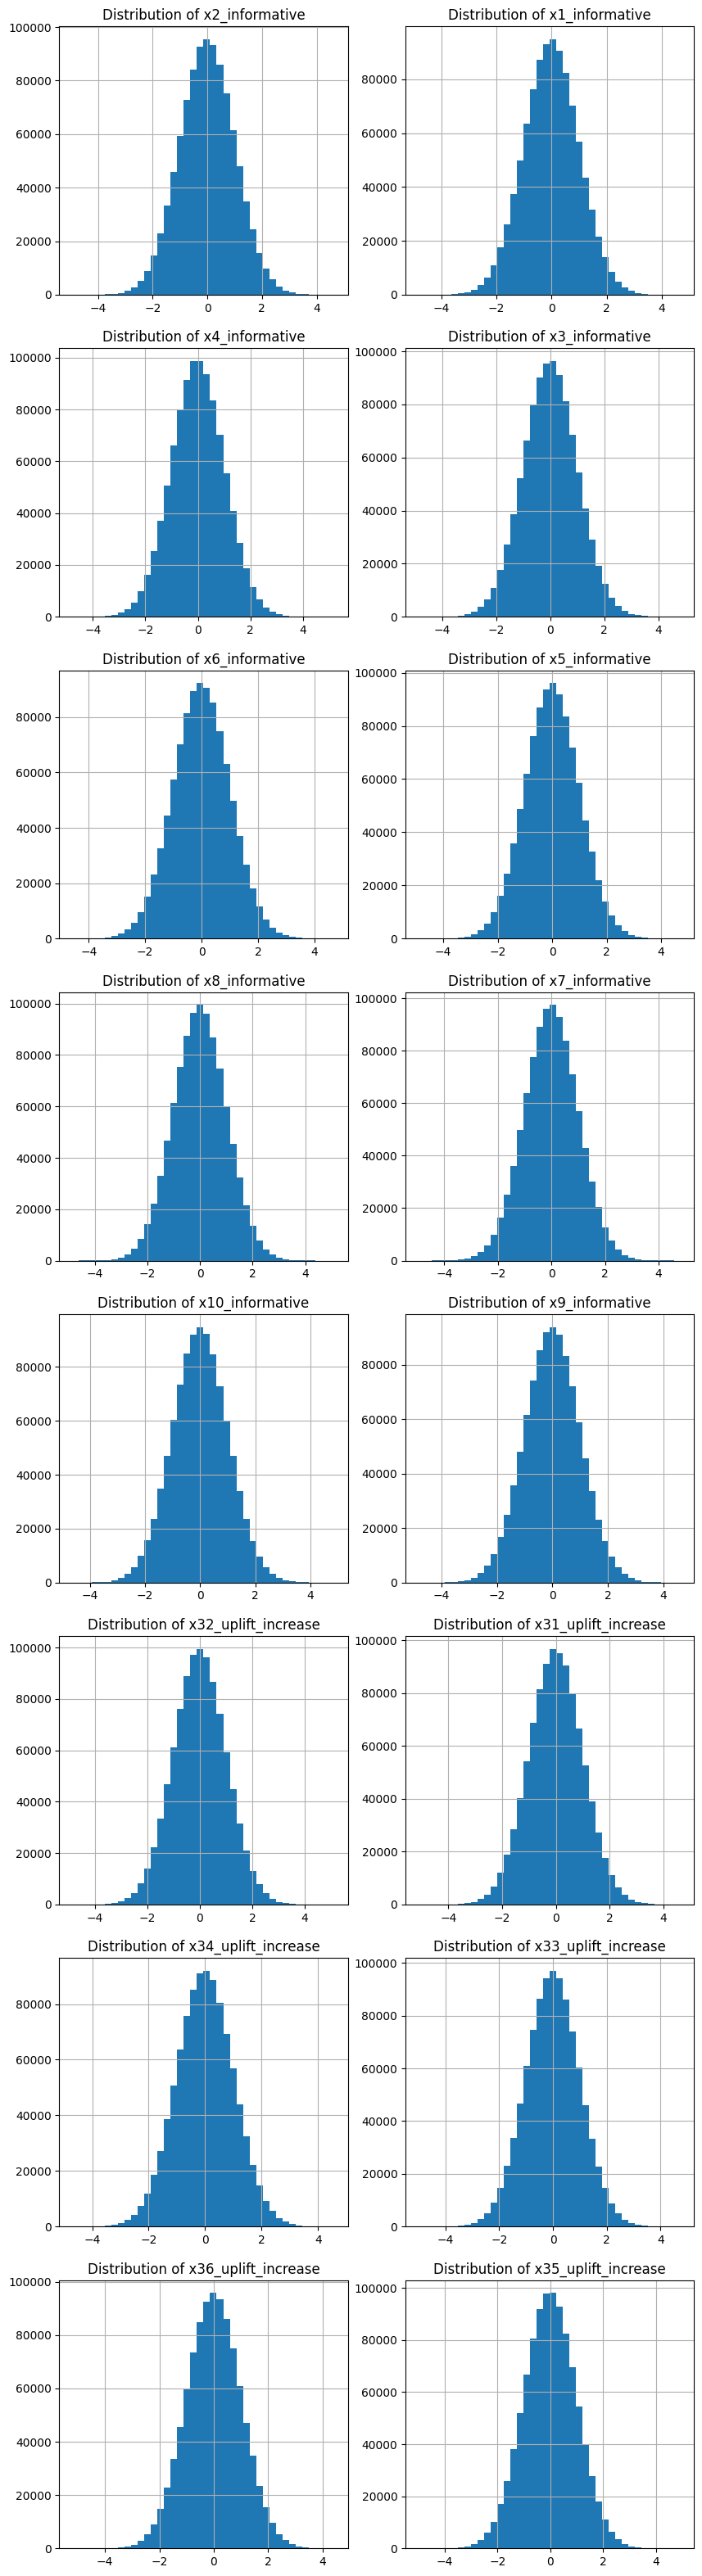

In [40]:
fig, ax = plt.subplots(8, 2, figsize=(10, 40))
for i, el in enumerate(func_list):
    if i % 2 == 0:
        j = 1
    else: 
        j = 0
    ax[i // 2][j].hist(data[el], 40)
    ax[i // 2][j].set_title(f'Distribution of {el}')
    ax[i // 2][j].grid()
plt.show()

<Axes: >

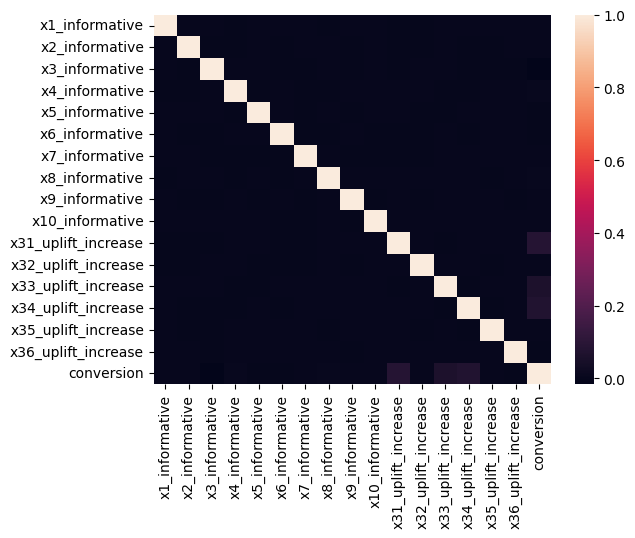

In [48]:
func_list.append('conversion')
sns.heatmap(data[func_list].corr())

In [52]:
X_train, X_val, trmnt_train, trmnt_val, y_train, y_val = train_test_split(
    data[func_list],
    data.treatment_group_key,
    data.conversion,
    stratify=data.treatment_group_key,
    test_size=0.3,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Train shape: (700000, 16)
Validation shape: (300000, 16)


In [58]:
estimator = CatBoostClassifier(verbose=100, 
                               random_state=42,
                               thread_count=1)

ct_model = ClassTransformation(estimator=estimator)

In [59]:
ct_model.fit(
    X=X_train, 
    y=y_train, 
    treatment=trmnt_train
)

Learning rate set to 0.168963
0:	learn: 0.6885182	total: 160ms	remaining: 2m 39s
100:	learn: 0.6668494	total: 10.9s	remaining: 1m 36s
200:	learn: 0.6644508	total: 21.8s	remaining: 1m 26s
300:	learn: 0.6622272	total: 32.7s	remaining: 1m 15s
400:	learn: 0.6600308	total: 43.2s	remaining: 1m 4s
500:	learn: 0.6579572	total: 53.9s	remaining: 53.7s
600:	learn: 0.6559823	total: 1m 4s	remaining: 42.9s
700:	learn: 0.6539523	total: 1m 15s	remaining: 32.2s
800:	learn: 0.6520179	total: 1m 26s	remaining: 21.5s
900:	learn: 0.6500607	total: 1m 37s	remaining: 10.7s
999:	learn: 0.6482424	total: 1m 47s	remaining: 0us


ClassTransformation(estimator=<catboost.core.CatBoostClassifier object at 0x17519bfd0>)

In [61]:
uplift_ct = ct_model.predict(X_val)

In [62]:
auqc = qini_auc_score(y_val, uplift_ct, trmnt_val) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.1946
